<a href="https://colab.research.google.com/github/IshaSarangi/Edureka_Notes/blob/main/Edureka_DecisionTree_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1D18NGYtjqDzKHrHGpkc_g2Kb0SgTH2BA?usp=sharing

###Problem Statement
The dataset contains information about three brands named: US, Japan and Europe. Other parameters are given about the cars.

Objective: Train a Decision-Tree Model which can predict the brand of the car.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Read Data
car_df = pd.read_csv('/content/cars.csv')
car_df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
print(car_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    int64  
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 16.4+ KB
None


In [4]:
#Check null values
car_df.isnull().sum()

,0
mpg,0
cylinders,0
cubicinches,0
hp,0
weightlbs,0
time-to-60,0
year,0
brand,0


In [5]:
#Encoding Target variable
le = LabelEncoder()
car_df['brand'] = le.fit_transform(car_df['brand'])
print(car_df)

      mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year  brand
0    14.0          8          350  165       4209          12  1972      2
1    31.9          4           89   71       1925          14  1980      0
2    17.0          8          302  140       3449          11  1971      2
3    15.0          8          400  150       3761          10  1971      2
4    30.5          4           98   63       2051          17  1978      2
..    ...        ...          ...  ...        ...         ...   ...    ...
256  17.0          8          305  130       3840          15  1980      2
257  36.1          4           91   60       1800          16  1979      1
258  22.0          6          232  112       2835          15  1983      2
259  18.0          6          232  100       3288          16  1972      2
260  22.0          6          250  105       3353          15  1977      2

[261 rows x 8 columns]


In [6]:
#Dropping 'year' feature
car_df.drop('year',axis=1,inplace=True)
print(car_df)

      mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  brand
0    14.0          8          350  165       4209          12      2
1    31.9          4           89   71       1925          14      0
2    17.0          8          302  140       3449          11      2
3    15.0          8          400  150       3761          10      2
4    30.5          4           98   63       2051          17      2
..    ...        ...          ...  ...        ...         ...    ...
256  17.0          8          305  130       3840          15      2
257  36.1          4           91   60       1800          16      1
258  22.0          6          232  112       2835          15      2
259  18.0          6          232  100       3288          16      2
260  22.0          6          250  105       3353          15      2

[261 rows x 7 columns]


In [7]:
#Segregating Independent and dependent variables
x=car_df.drop('brand',axis=1)
y=car_df['brand']
print(x)
print(y)

      mpg  cylinders  cubicinches   hp  weightlbs  time-to-60
0    14.0          8          350  165       4209          12
1    31.9          4           89   71       1925          14
2    17.0          8          302  140       3449          11
3    15.0          8          400  150       3761          10
4    30.5          4           98   63       2051          17
..    ...        ...          ...  ...        ...         ...
256  17.0          8          305  130       3840          15
257  36.1          4           91   60       1800          16
258  22.0          6          232  112       2835          15
259  18.0          6          232  100       3288          16
260  22.0          6          250  105       3353          15

[261 rows x 6 columns]
0      2
1      0
2      2
3      2
4      2
      ..
256    2
257    1
258    2
259    2
260    2
Name: brand, Length: 261, dtype: int64


In [8]:
#Scaling numeric features
# sc = StandardScaler()
# x_scaled = sc.fit_transform(x)
# print(x_scaled)

In [9]:
#Train and Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
#Train DT Algorithm
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

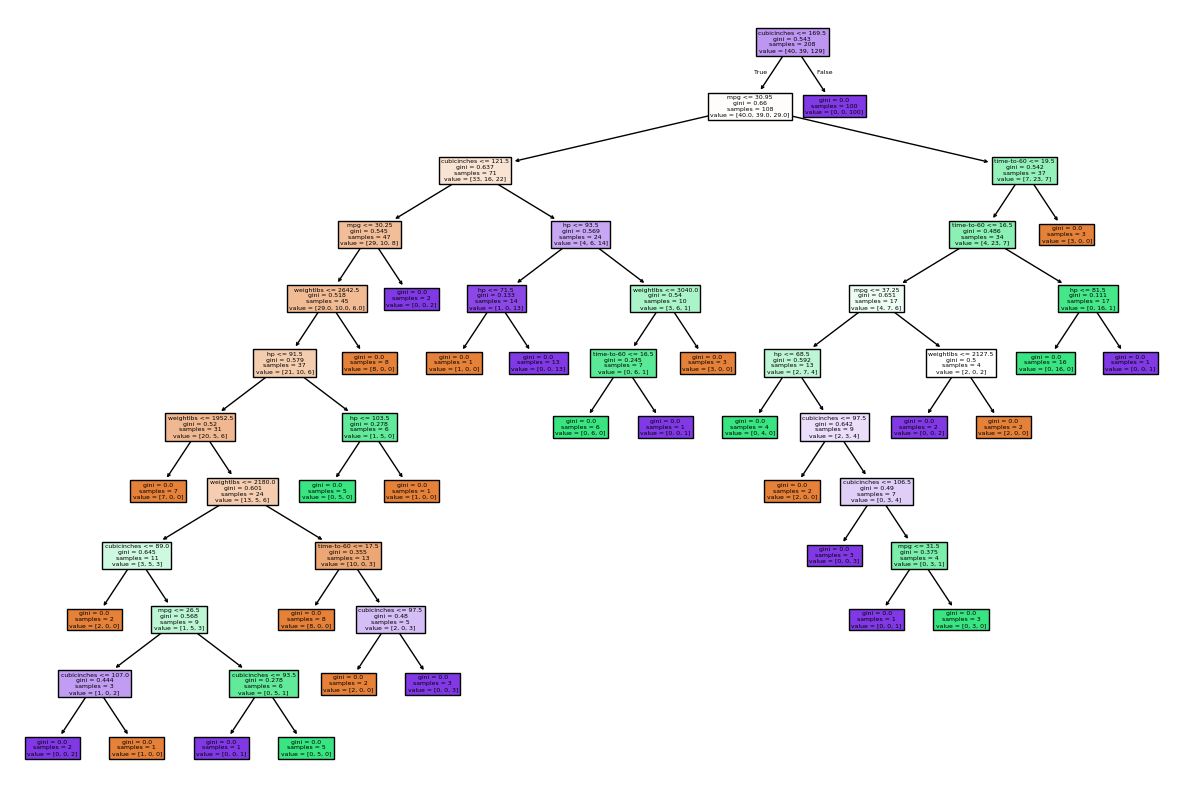

In [11]:
#Plot DT made by algorithm
plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, feature_names=x.columns)
plt.savefig('dt_tree.png', dpi=300)
plt.show()

In [12]:
#Evaluate the model on Train
y_pred_train=dt.predict(x_train)
print(y_pred_train)

[0 0 0 2 2 1 0 2 1 2 2 2 2 0 2 0 2 1 2 0 2 2 2 1 2 2 2 1 2 2 2 1 1 2 0 1 1
 0 2 2 2 1 2 0 1 1 2 2 1 2 2 0 2 0 2 1 2 0 2 2 1 2 2 1 2 2 0 2 2 2 2 2 1 2
 2 2 2 1 2 2 0 2 1 2 2 0 2 1 2 2 2 2 2 0 2 1 2 2 2 2 2 0 1 2 1 2 2 1 0 2 2
 1 2 2 0 0 0 2 2 2 0 0 1 0 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 0 0 1 0 1
 2 2 0 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 0 1 0 2 2 2 2 1 1 1 2 2 2
 2 1 2 2 2 0 2 2 1 2 2 0 2 0 2 1 2 0 0 2 2 2 0]


In [13]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00       129

    accuracy                           1.00       208
   macro avg       1.00      1.00      1.00       208
weighted avg       1.00      1.00      1.00       208



In [14]:
#Evaluate the model on Test
y_pred_test=dt.predict(x_test)
print(y_pred_test)

[2 0 2 2 2 1 2 2 0 2 1 2 0 0 2 1 2 1 2 2 1 2 2 2 0 0 0 2 1 2 2 1 2 2 2 2 2
 2 1 2 2 2 1 1 2 2 2 0 1 1 2 2 0]


In [15]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.75      0.75      0.75        12
           2       0.97      0.94      0.95        33

    accuracy                           0.87        53
   macro avg       0.80      0.81      0.80        53
weighted avg       0.87      0.87      0.87        53



In [16]:
dt1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
dt1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:
y_pred_train1 = dt1.predict(x_train)
print(y_pred_train1)
print(classification_report(y_train,y_pred_train1))

[0 0 0 2 2 1 0 2 0 2 2 2 2 0 2 0 2 2 2 2 2 2 2 1 2 2 2 0 2 0 2 0 1 2 0 1 1
 2 2 2 2 1 2 0 1 0 2 2 2 1 2 0 2 0 2 2 2 2 2 2 1 0 2 1 2 1 0 2 2 2 2 2 1 2
 2 2 2 1 2 2 0 2 1 2 2 0 2 1 2 2 2 2 2 0 2 1 2 0 2 2 2 0 1 2 0 2 2 1 0 2 2
 2 2 2 0 0 0 2 2 2 0 0 0 2 1 1 2 0 2 1 1 2 1 0 2 2 2 2 2 2 2 2 2 0 0 1 0 0
 2 2 1 2 2 2 2 2 2 0 2 0 1 0 2 1 2 2 0 2 2 2 2 1 0 1 0 2 2 2 2 0 2 1 2 2 2
 2 0 2 2 2 0 2 0 1 2 2 0 2 0 2 1 1 1 0 2 2 2 0]
              precision    recall  f1-score   support

           0       0.64      0.80      0.71        40
           1       0.68      0.59      0.63        39
           2       0.92      0.88      0.90       129

    accuracy                           0.81       208
   macro avg       0.75      0.76      0.75       208
weighted avg       0.82      0.81      0.81       208



In [18]:
y_pred_test1 = dt.predict(x_test)
print(y_pred_test1)
print(classification_report(y_test,y_pred_test1))

[2 0 2 2 2 1 2 2 0 2 1 2 0 0 2 1 2 1 2 2 1 2 2 2 0 0 0 2 1 2 2 1 2 2 2 2 2
 2 1 2 2 2 1 1 2 2 2 0 1 1 2 2 0]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.75      0.75      0.75        12
           2       0.97      0.94      0.95        33

    accuracy                           0.87        53
   macro avg       0.80      0.81      0.80        53
weighted avg       0.87      0.87      0.87        53



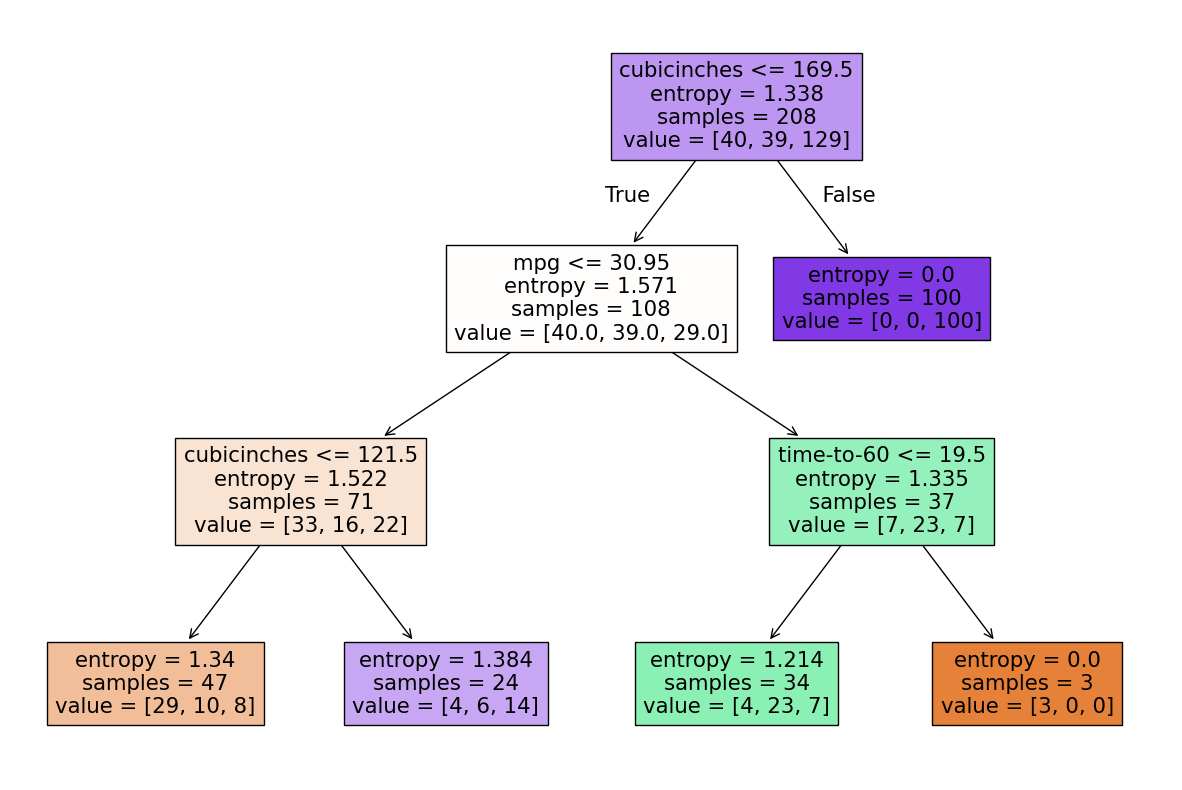

In [19]:
plt.figure(figsize=(15,10))
plot_tree(dt1,filled=True,feature_names=x.columns)
plt.savefig('dtree_pruned.png',dpi=300)
plt.show()

In [20]:
#Features Importances
print(dt.feature_importances_)
imp_df=pd.DataFrame({'Features':x.columns,'Importance':dt.feature_importances_}).sort_values(by='Importance',ascending=False)
print(imp_df)

[0.11794883 0.         0.52472513 0.1534637  0.10613236 0.09772998]
      Features  Importance
2  cubicinches    0.524725
3           hp    0.153464
0          mpg    0.117949
4    weightlbs    0.106132
5   time-to-60    0.097730
1    cylinders    0.000000


Hyper Parameter Tuning- GridSearchCV

In [21]:
#Criteron, max_depth, min_samples_leaf

In [22]:
#Grid of parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[3,4,5], 'min_samples_leaf': [5, 10, 50]}
gridcv = GridSearchCV(dt, param_grid, cv=5) #(model, grid, cross-validation)
gridcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5],
                         'min_samples_leaf': [5, 10, 50]})

In [23]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [24]:
dt_tuned = DecisionTreeClassifier(criterion='gini', max_depth = 5, min_samples_leaf = 5)
dt_tuned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [26]:
y_pred_train_tuned = dt_tuned.predict(x_train)
# print(y_pred_train_tuned)
print(classification_report(y_train,y_pred_train_tuned))

              precision    recall  f1-score   support

           0       0.68      0.90      0.77        40
           1       0.85      0.74      0.79        39
           2       0.97      0.91      0.94       129

    accuracy                           0.88       208
   macro avg       0.83      0.85      0.83       208
weighted avg       0.89      0.88      0.88       208



In [27]:
y_pred_test = dt_tuned.predict(x_test)
# print(y_pred_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.70      0.58      0.64        12
           2       0.94      0.88      0.91        33

    accuracy                           0.81        53
   macro avg       0.74      0.78      0.75        53
weighted avg       0.83      0.81      0.81        53

